In [98]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

# Grab and process the raw data.
text_raw = pd.read_csv('imdb_labelled.txt', delimiter= '\t', header=None)
text_raw.columns = ['message', 'sentiment']

In [99]:
#model 1: 29 keywords
keywords = ['boring', 'awful', 'sucked', 'too', 'lame', 'contrived', 
            'derivative', 'predictable', 'dumb', 'stupid', 'insipid',  
            'unfunny', 'disappointed', 'pretentious', 'bad', 'waste', 'artless', 
            'appalling', 'don\'t', 'lousy', 'amateurish', 'lacks', 'lacked', 
            'trash', 'cheap', 'worst', 'dry', 'terrible', 'annoying']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    text_raw[str(key)] = text_raw.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [100]:
text_raw['sentiment'] = (text_raw['sentiment'] == 0)

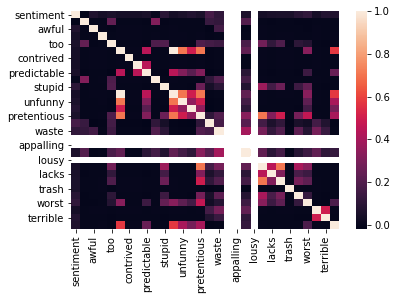

In [101]:
sns.heatmap(text_raw.corr())
plt.show()

In [102]:
data = text_raw[keywords]
target = text_raw['sentiment']

# Instantiate, fit, classify
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(data, target)
y_pred = bnb.predict(data)

print("accuracy: {}".format(
    (1 - target != y_pred).sum() / data.shape[0]
))

accuracy: 0.6176470588235294


In [103]:
from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test))[:6])
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.4, random_state=20)
print('With 40% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test))[:6])
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.6, random_state=20)
print('With 60% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test))[:6])
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.8, random_state=20)
print('With 80% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test))[:6])
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target))[:5])
print('\n')

#perform 20-fold cross-validation
from sklearn.model_selection import cross_val_score
print("20-fold cross-validation:")
print(cross_val_score(bnb, data, target, cv=20))
print('\n')

#use 2x2 confusion matrix
from sklearn.metrics import confusion_matrix
print("confusion matrix: ")
print(confusion_matrix(target, y_pred))

With 20% Holdout: 0.5866
With 40% Holdout: 0.6
With 60% Holdout: 0.6124
With 80% Holdout: 0.5826
Testing on Sample: 0.617


20-fold cross-validation:
[0.61538462 0.46153846 0.60526316 0.60526316 0.60526316 0.57894737
 0.64864865 0.62162162 0.67567568 0.59459459 0.54054054 0.64864865
 0.62162162 0.64864865 0.59459459 0.64864865 0.48648649 0.75675676
 0.72972973 0.62162162]


confusion matrix: 
[[373  13]
 [273  89]]


Model 1 (29 features) returned many more false negatives than false positives, which indicates underfitting of the data. However, the cross-validation showed a wide range in results, which indicates over-fitting. For model 2 I'll add an additional 10 features. 

In [104]:
#model 2: 39 keywords
add_list = ['utterly', 'premise', 'moronic', 'not', 'torture', 'unconvincing', 
            'flawed', 'unwatchable', 'offensive', 'failed']

augmented_keywords = keywords.copy()

for word in add_list:
    augmented_keywords.append(word)

for key in augmented_keywords:
    text_raw[str(key)] = text_raw.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
text_raw['sentiment'] = (text_raw['sentiment'] == 0)
    
data = text_raw[augmented_keywords]
target = text_raw['sentiment']

from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(data, target)
y_pred = bnb.predict(data)
print("accuracy after adding features: {}".format(
    (1 - target != y_pred).sum() / data.shape[0]
))
print('\n')

# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test))[:6])
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.4, random_state=20)
print('With 40% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test))[:6])
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.6, random_state=20)
print('With 60% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test))[:6])
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.8, random_state=20)
print('With 80% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test))[:6])
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target))[:5])
print('\n')

#perform 20-fold cross-validation
print("20-fold cross-validation:")
print(cross_val_score(bnb, data, target, cv=20))
print('\n')

#use 2x2 confusion matrix
print("confusion matrix: ")
print(confusion_matrix(target, y_pred))

accuracy after adding features: 0.6377005347593583


With 20% Holdout: 0.6133
With 40% Holdout: 0.61
With 60% Holdout: 0.6213
With 80% Holdout: 0.5993
Testing on Sample: 0.637


20-fold cross-validation:
[0.61538462 0.51282051 0.60526316 0.63157895 0.57894737 0.57894737
 0.67567568 0.62162162 0.72972973 0.7027027  0.56756757 0.67567568
 0.62162162 0.67567568 0.62162162 0.64864865 0.45945946 0.72972973
 0.75675676 0.59459459]


confusion matrix: 
[[115 247]
 [ 24 362]]


For model 2, the confusion matrix showed many more false positives (247) than false negatives (24). This indicates overfitting of the data. The cross validation also showed more fluctuation than in model 1, which also indicates over-fitting. For model 3 I'll use what I think are the best 26 features.

In [105]:
#model 3: hand-selected 'best' features
best_keywords = ['boring', 'awful', 'lame', 'predictable', 
                 'dumb', 'stupid',  'unfunny', 'disappointed', 
                 'pretentious', 'bad', 'waste', 'lousy', 
                 'amateurish', 'lacks', 'lacked', 'trash', 
                 'cheap', 'worst', 'terrible', 'annoying',
                 'torture', 'unconvincing', 'flawed', 
                 'unwatchable', 'offensive', 'failed']

for key in best_keywords:
    text_raw[str(key)] = text_raw.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
text_raw['sentiment'] = (text_raw['sentiment'] == 0)
    
data = text_raw[best_keywords]
target = text_raw['sentiment']

from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(data, target)
y_pred = bnb.predict(data)
print("accuracy after adding features: {}".format(
    (1 - target != y_pred).sum() / data.shape[0]
))
print('\n')

# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test))[:6])
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.4, random_state=20)
print('With 40% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test))[:6])
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.6, random_state=20)
print('With 60% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test))[:6])
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.8, random_state=20)
print('With 80% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test))[:6])
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target))[:5])
print('\n')

#perform 20-fold cross-validation
print("20-fold cross-validation:")
print(cross_val_score(bnb, data, target, cv=20))
print('\n')

#use 2x2 confusion matrix
print("confusion matrix: ")
print(confusion_matrix(target, y_pred))

accuracy after adding features: 0.6136363636363636


With 20% Holdout: 0.5866
With 40% Holdout: 0.6
With 60% Holdout: 0.6124
With 80% Holdout: 0.5759
Testing on Sample: 0.613


20-fold cross-validation:
[0.58974359 0.48717949 0.60526316 0.60526316 0.55263158 0.63157895
 0.64864865 0.62162162 0.67567568 0.59459459 0.54054054 0.64864865
 0.62162162 0.64864865 0.59459459 0.64864865 0.48648649 0.72972973
 0.67567568 0.62162162]


confusion matrix: 
[[379   7]
 [282  80]]


In [106]:
#try count vectorizer
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(1, 3), max_df=0.05, min_df=0.0001)
X = vectorizer.fit_transform(text_raw)

print(vectorizer.get_feature_names())
print(X.toarray())


['amateurish', 'annoying', 'appalling', 'artless', 'awful', 'bad', 'boring', 'cheap', 'contrived', 'derivative', 'disappointed', 'don', 'dry', 'dumb', 'failed', 'flawed', 'insipid', 'lacked', 'lacks', 'lame', 'lousy', 'message', 'moronic', 'not', 'offensive', 'predictable', 'premise', 'pretentious', 'sentiment', 'stupid', 'sucked', 'terrible', 'too', 'torture', 'trash', 'unconvincing', 'unfunny', 'unwatchable', 'utterly', 'waste', 'worst']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


To take this further, the next step wouuld be tuning the three count vectorizer parameters: ngram range, which I've set to phrases of 3 words, and max and min df, which I set to 5% and 0.01% respectively. Max df should eliminate very common words that don't give any indication of sentiment, like "I" and "the," and min df should eliminate extremely uncommon words such as misspellings. 